In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Executive Summary

Given 11,000 unique pet names extracted from Seattle's pet registration data, about 51% are "people" names, meaning they have appeared in the US Census. 

The actual distribution of names among 49,000 pets, however, shows that 80% of pets have "people" names.

### <a id="lingustic_analysis"></a>Linguistic Analysis Method

The whole reason I started playing with this data was because I wanted to know how many pets had "people" names. 
My hope was that this would be a good "slicing" variable (a data science colleague advised finding something that slice the data in half, if possible).

I admit, I struggled a bit with how to approach this, especially because I knew I'd need a sample of names. I originally thought about comparing the names against US baby names using [the SSA form](https://www.ssa.gov/cgi-bin/babyname.cgi) for the last 50 years, but I kept getting timed out. So I asked another data science friend, and she had a better idea: use the [data portal](https://www.ssa.gov/oact/babynames/limits.html), which lets you download text files of baby names for the last 100 years or so! 

Armed with those files, I made a super-file of all names. After isolating the first name of each pet -- because yes, many of them have last names! -- I compared the pet's first name to the list, and if it appeared, flagged the pet name as a "people" name. 

This is certainly not a perfect method, and I'm sure there are refinements that could be made. But by including all human names available, I hoped to reflect both current demographics and past ones. 

This initial analysis gave me the distrubition of human names amoung the pets registered, which was was 80% "people" names; I also wanted to see what the distribution looked like for the unique names -- and this did, indeed, turn out to be almost 50/50!

#### Remaining Linguistic Questions

Now that I've answered my initial question, I'd really like to dig into the name data. How many pets have "food" names? Or color-related names? Or "punny" names, or pop culture names? (These are just some trends I've noticed while playing with the data.)

Unfortunately I haven't found an easy (read: lazy) way to analyze this; I really like pudding.cool's [method for analyzing foundation color names](https://github.com/the-pudding/data/tree/master/foundation-names#allcategoriescsv--allcategoriesr), but they did it manually, and their data set was smaller.

I'm also really interested in [this 2022 study](https://journals.sagepub.com/doi/full/10.1177/01902725221090900), which found that perception of race and "human-ness" had observable effects on time to pet adoption. I admit, this also made me feel a bit less silly about my own research! But again, the method used to identify the type of name was a survey, and the researchers had some very interesting results in terms of whether a name was "human" or not. 

In [2]:
pets = pd.read_csv('cleaned_pet_data_copy.csv', usecols=[2,3,4])

In [3]:
pets.columns= ['name', 'species', 'breed']

In [4]:
pets

,name,species,breed
0,NaN,Dog,Shepherd
1,Fancy,Dog,"Retriever, Labrador"
2,Skip,Dog,Siberian Husky
3,Kanga,Dog,German Shepherd
4,Oscar,Dog,"Retriever, Golden"
...,...,...,...
49225,Cheddar,Dog,"Welsh Corgi, Pembroke"
49226,Sam,Dog,"Retriever, Labrador"
49227,Leroy,Dog,"Poodle, Miniature"
49228,Cookie,Dog,"Terrier, American Pit Bull"


In [5]:
pets = pets.dropna(subset=['name'])

In [6]:
pets

,name,species,breed
1,Fancy,Dog,"Retriever, Labrador"
2,Skip,Dog,Siberian Husky
3,Kanga,Dog,German Shepherd
4,Oscar,Dog,"Retriever, Golden"
5,Cassie,Dog,"Retriever, Golden"
...,...,...,...
49225,Cheddar,Dog,"Welsh Corgi, Pembroke"
49226,Sam,Dog,"Retriever, Labrador"
49227,Leroy,Dog,"Poodle, Miniature"
49228,Cookie,Dog,"Terrier, American Pit Bull"


In [7]:
pets['first_name'] = pets['name'].apply(lambda x: x.split(' ')[0] )

/opt/miniconda3/envs/pets/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
pets

,name,species,breed,first_name
1,Fancy,Dog,"Retriever, Labrador",Fancy
2,Skip,Dog,Siberian Husky,Skip
3,Kanga,Dog,German Shepherd,Kanga
4,Oscar,Dog,"Retriever, Golden",Oscar
5,Cassie,Dog,"Retriever, Golden",Cassie
...,...,...,...,...
49225,Cheddar,Dog,"Welsh Corgi, Pembroke",Cheddar
49226,Sam,Dog,"Retriever, Labrador",Sam
49227,Leroy,Dog,"Poodle, Miniature",Leroy
49228,Cookie,Dog,"Terrier, American Pit Bull",Cookie


In [9]:
all_human_names = pd.read_csv('all_names.csv')

In [10]:
all_human_names

,first_name,count
0,Aaban,120
1,Aabha,46
2,Aabid,16
3,Aabidah,5
4,Aabir,10
...,...,...
100359,Zyvion,5
100360,Zyvon,7
100361,Zyyanna,6
100362,Zyyon,6


In [11]:
name_list = all_human_names['first_name'].tolist()

In [12]:
pets['people_name'] = pets['first_name'].apply(lambda x: 'yes' if x in name_list else 'no' )

/opt/miniconda3/envs/pets/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
pets

,name,species,breed,first_name,people_name
1,Fancy,Dog,"Retriever, Labrador",Fancy,yes
2,Skip,Dog,Siberian Husky,Skip,yes
3,Kanga,Dog,German Shepherd,Kanga,no
4,Oscar,Dog,"Retriever, Golden",Oscar,yes
5,Cassie,Dog,"Retriever, Golden",Cassie,yes
...,...,...,...,...,...
49225,Cheddar,Dog,"Welsh Corgi, Pembroke",Cheddar,no
49226,Sam,Dog,"Retriever, Labrador",Sam,yes
49227,Leroy,Dog,"Poodle, Miniature",Leroy,yes
49228,Cookie,Dog,"Terrier, American Pit Bull",Cookie,yes


In [14]:
pets['people_name'].value_counts()

yes    39187
no      9754
Name: people_name, dtype: int64

In [15]:
short_pets = pets.drop_duplicates('first_name')

In [16]:
short_pets['people_name'].value_counts()

yes    5660
no     5414
Name: people_name, dtype: int64

In [48]:
pets

,name,species,breed,first_name,people_name
1,Fancy,Dog,"Retriever, Labrador",Fancy,yes
2,Skip,Dog,Siberian Husky,Skip,yes
3,Kanga,Dog,German Shepherd,Kanga,no
4,Oscar,Dog,"Retriever, Golden",Oscar,yes
5,Cassie,Dog,"Retriever, Golden",Cassie,yes
...,...,...,...,...,...
49225,Cheddar,Dog,"Welsh Corgi, Pembroke",Cheddar,no
49226,Sam,Dog,"Retriever, Labrador",Sam,yes
49227,Leroy,Dog,"Poodle, Miniature",Leroy,yes
49228,Cookie,Dog,"Terrier, American Pit Bull",Cookie,yes


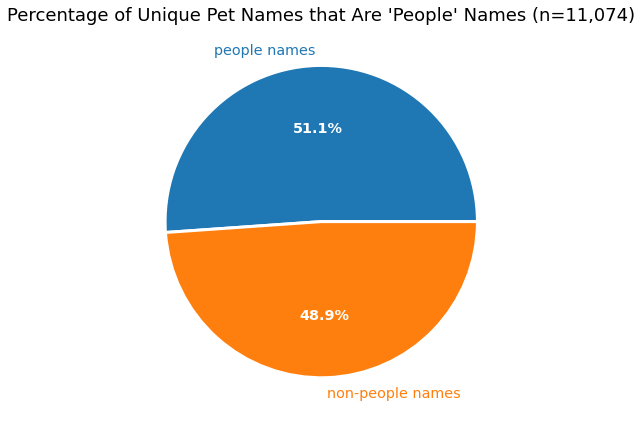

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

x = short_pets['people_name'].value_counts()
labels=['people names', 'non-people names']

patches, texts, pcts= ax.pie(x, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title("Percentage of Unique Pet Names that Are 'People' Names (n=11,074)", fontsize=18)
plt.tight_layout()

fig = plt.gcf()
fig.savefig('unique_pet_percentage.png', dpi=100)

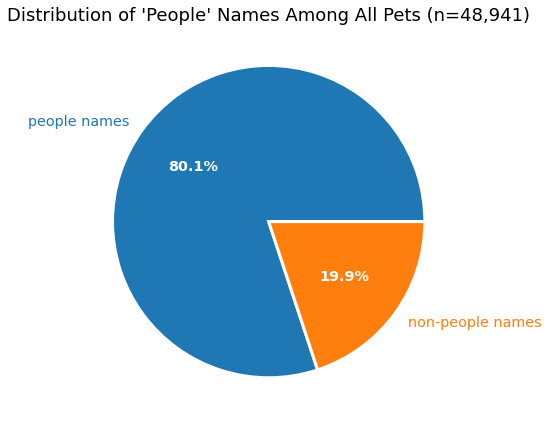

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

y = pets['people_name'].value_counts()
labels=['people names', 'non-people names']

patches, texts, pcts= ax.pie(y, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title("Distribution of 'People' Names Among All Pets (n=48,941)", fontsize=18)
plt.tight_layout()

fig = plt.gcf()
fig.savefig('total_pet_percentage.png', dpi=100)

In [ ]:
# helpful review of pie charts lol\
# https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/